In [39]:
import pandas as pd
import os
import sys
from pathlib import Path

In [ ]:
os.chdir("../")

'/Users/hh/MLops/ajjil_technical_task'

In [50]:
df = pd.read_csv("artifacts/data_ingestion/purchase-order-items.csv")

Basic structure

How many rows & columns?

What are the column names?

Data types

Which columns are numbers, text, or dates?

Missing values

Are there NaNs / blanks?

Duplicates

Any repeated rows or IDs?

Text characteristics

Item descriptions: languages present (English, Arabic, maybe mixed).

Length of descriptions (short vs. long).

Spend values

Are there price/amount columns?

What’s the range? Outliers?

In [42]:
df.tail()

,Item ID,Item Name,Quantity,Total Bcy,Sub Total Bcy,Purchase Order ID,Product ID,Currency Code,Account ID,Tax ID,Project ID
3145,3263831000016006011,"ITTIFAQ STEEL 14mm, 12 meter",30.0,69000.0,69000.0,3263831000016006001,3.263831e+18,SAR,3263831000000034003,3.263831e+18,NaN
3146,3263831000016006009,"ITTIFAQ STEEL 12mm, 12 meter",30.0,69000.0,69000.0,3263831000016006001,3.263831e+18,SAR,3263831000000034003,3.263831e+18,NaN
3147,3263831000016208289,حديد تسليح مجدول سعودي سابك 16 مم * 12 م,30.0,69000.0,69000.0,3263831000016208283,3.263831e+18,SAR,3263831000000034003,3.263831e+18,NaN
3148,3263831000016208285,حديد تسليح مجدول سعودي سابك 12 مم * 12 م,30.0,69000.0,69000.0,3263831000016208283,3.263831e+18,SAR,3263831000000034003,3.263831e+18,NaN
3149,3263831000018023011,حديد تسليح مجدول سعودي سابك 16 مم * 12 م,30.0,69000.0,69000.0,3263831000018023005,3.263831e+18,SAR,3263831000000034003,3.263831e+18,NaN


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Item ID            3150 non-null   int64  
 1   Item Name          2910 non-null   object 
 2   Quantity           3150 non-null   float64
 3   Total Bcy          3150 non-null   float64
 4   Sub Total Bcy      3150 non-null   float64
 5   Purchase Order ID  3150 non-null   int64  
 6   Product ID         2910 non-null   float64
 7   Currency Code      3150 non-null   object 
 8   Account ID         3150 non-null   int64  
 9   Tax ID             3085 non-null   float64
 10  Project ID         0 non-null      float64
dtypes: float64(6), int64(3), object(2)
memory usage: 270.8+ KB


In [44]:
df.isnull().sum()


Item ID                 0
Item Name             240
Quantity                0
Total Bcy               0
Sub Total Bcy           0
Purchase Order ID       0
Product ID            240
Currency Code           0
Account ID              0
Tax ID                 65
Project ID           3150
dtype: int64

In [45]:
df.describe()

,Item ID,Quantity,Total Bcy,Sub Total Bcy,Purchase Order ID,Product ID,Account ID,Tax ID,Project ID
count,3.150000e+03,3150.000000,3.150000e+03,3.150000e+03,3.150000e+03,2.910000e+03,3.150000e+03,3.085000e+03,0.0
mean,3.263831e+18,475.470797,4.853890e+04,4.854089e+04,3.263831e+18,3.263831e+18,3.263831e+18,3.263831e+18,NaN
std,7.627889e+06,2737.024475,1.046032e+05,1.046032e+05,7.629406e+06,7.281517e+06,1.174301e+03,1.536249e+03,NaN
min,3.263831e+18,0.150000,0.000000e+00,0.000000e+00,3.263831e+18,3.263831e+18,3.263831e+18,3.263831e+18,NaN
25%,3.263831e+18,7.000000,2.001473e+03,2.001473e+03,3.263831e+18,3.263831e+18,3.263831e+18,3.263831e+18,NaN
50%,3.263831e+18,30.000000,1.235133e+04,1.237840e+04,3.263831e+18,3.263831e+18,3.263831e+18,3.263831e+18,NaN
75%,3.263831e+18,130.000000,5.599900e+04,5.599900e+04,3.263831e+18,3.263831e+18,3.263831e+18,3.263831e+18,NaN
max,3.263831e+18,70000.000000,1.519000e+06,1.519000e+06,3.263831e+18,3.263831e+18,3.263831e+18,3.263831e+18,NaN


In [46]:
df['Purchase Order ID'].value_counts()

Purchase Order ID
3263831000017363001    99
3263831000022471084    90
3263831000009330075    87
3263831000007223023    62
3263831000016759017    59
                       ..
3263831000014050462     1
3263831000014181028     1
3263831000004821044     1
3263831000014514047     1
3263831000006506007     1
Name: count, Length: 531, dtype: int64

In [ ]:
check = df.groupby("Purchase Order ID")["Total Bcy"].nunique()
inconsistent = check[check > 1]
print("Number of inconsistent groups:", len(inconsistent))
print(inconsistent.head())


Number of inconsistent groups: 401
Purchase Order ID
3263831000000089040    3
3263831000000092040    6
3263831000000097043    6
3263831000000099094    4
3263831000000101066    5
Name: Total Bcy, dtype: int64


In [ ]:
df['Account ID'].value_counts()

Account ID
3263831000000034003    3149
3263831000000000409       1
Name: count, dtype: int64

In [60]:
df['Product ID'].value_counts()

Product ID
3.263831e+18    25
3.263831e+18    22
3.263831e+18    22
3.263831e+18    21
3.263831e+18    20
                ..
3.263831e+18     1
3.263831e+18     1
3.263831e+18     1
3.263831e+18     1
3.263831e+18     1
Name: count, Length: 907, dtype: int64

In [59]:
df['Currency Code'].value_counts()

Currency Code
SAR    3085
USD      65
Name: count, dtype: int64

In [51]:
df['Tax ID'].value_counts()

Tax ID
3.263831e+18    3085
Name: count, dtype: int64

In [63]:
cleaned_df = df.drop(columns=['Purchase Order ID', 'Product ID', 'Account ID', 'Tax ID', 'Project ID', 'Item ID'])

In [65]:
cleaned_df.describe()

,Quantity,Total Bcy,Sub Total Bcy
count,3150.000000,3.150000e+03,3.150000e+03
mean,475.470797,4.853890e+04,4.854089e+04
std,2737.024475,1.046032e+05,1.046032e+05
min,0.150000,0.000000e+00,0.000000e+00
25%,7.000000,2.001473e+03,2.001473e+03
50%,30.000000,1.235133e+04,1.237840e+04
75%,130.000000,5.599900e+04,5.599900e+04
max,70000.000000,1.519000e+06,1.519000e+06


In [ ]:
df[df['Item Name'].isnull()].head()

,Item ID,Item Name,Quantity,Total Bcy,Sub Total Bcy,Purchase Order ID,Product ID,Currency Code,Account ID,Tax ID,Project ID
0,3263831000000089042,NaN,75.21,227510.25,227510.25,3263831000000089040,NaN,SAR,3263831000000034003,3.263831e+18,NaN
1,3263831000000089046,NaN,15.00,47250.00,47250.00,3263831000000089040,NaN,SAR,3263831000000034003,3.263831e+18,NaN
2,3263831000000089044,NaN,50.00,160000.00,160000.00,3263831000000089040,NaN,SAR,3263831000000034003,3.263831e+18,NaN
3,3263831000000092044,NaN,12.00,38280.00,38280.00,3263831000000092040,NaN,SAR,3263831000000034003,3.263831e+18,NaN
4,3263831000000092052,NaN,2.00,5900.00,5900.00,3263831000000092040,NaN,SAR,3263831000000034003,3.263831e+18,NaN


In [95]:
df[df['Item Name'].isnull()][['Quantity', 'Total Bcy', 'Sub Total Bcy', 'Currency Code']].describe()

,Quantity,Total Bcy,Sub Total Bcy
count,240.000000,240.000000,240.000000
mean,1559.200875,63006.223125,63032.322417
std,6640.513722,72372.213970,72367.934825
min,1.000000,3.500000,3.500000
25%,10.000000,18997.000000,18997.000000
50%,30.000000,34760.000000,34984.500000
75%,200.000000,85125.000000,85125.000000
max,70000.000000,384000.000000,384000.000000


In [96]:
df['Item Name'].fillna("Unknown Product", inplace=True)

/var/folders/1z/knshtkp96gv94c7gjtb06jkh0000gn/T/ipykernel_41540/1080818081.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Item Name'].fillna("Unknown Product", inplace=True)


In [98]:
df.groupby('Item Name')['Total Bcy'].mean().sort_values(ascending=False).head(10)

Item Name
حديد كويل 9 مل                                                                                          1.099233e+06
Crump Rubber                                                                                            1.094850e+06
Ajeej Steel 14 mm - Shadeed                                                                             1.076100e+06
m 9 coil - حديد كويل 9 ملم املس                                                                         9.552000e+05
60 kVA / 48 kW 3 Battery Backup Uninterruptible Power Supply (UPS) And Power Conditioner                9.513000e+05
Ovation Rêve E-3 IP Includes: Light Engine Only, IP PowerKON Power Cord - NO LENS TUBE Control: 5-pi    9.388692e+05
G40 حديد مجلفن 8                                                                                        9.000000e+05
Apply and Supply Reinforcement Steel Dim 16 mm                                                          8.160000e+05
حديد كويل 11 مل                                       

In [104]:
total_revenue = df['Total Bcy'].sum()
unknown_revenue = df[df['Item Name'] == "Unknown Product"]['Total Bcy'].sum()
percent_unknown = (unknown_revenue / total_revenue) * 100

print(percent_unknown)

9.889952597308465


In [ ]:
df['Quantity'].describe()

count     3150.000000
mean       475.470797
std       2737.024475
min          0.150000
25%          7.000000
50%         30.000000
75%        130.000000
max      70000.000000
Name: Quantity, dtype: float64

<Axes: >

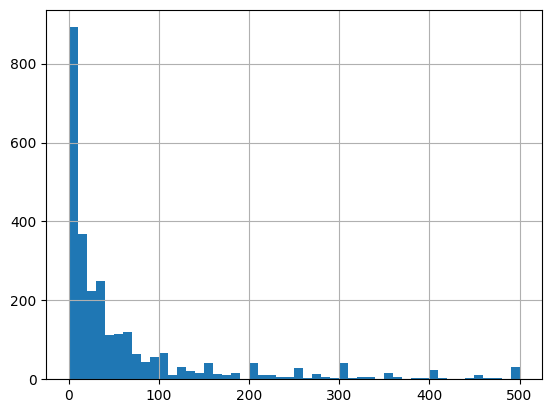

In [107]:
df['Quantity'].hist(bins=50, range=(0, 500))

<Axes: >

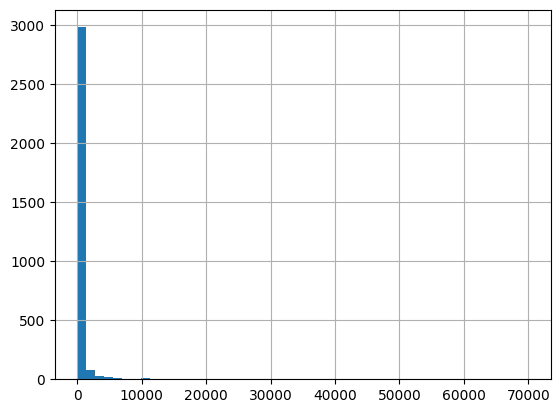

In [ ]:
df['Quantity'].hist(bins=50)

In [108]:
df.sort_values('Quantity', ascending=False).head(10)[['Item Name', 'Quantity', 'Total Bcy']]

,Item Name,Quantity,Total Bcy
176,Unknown Product,70000.0,201250.00
175,Unknown Product,60000.0,172500.00
633,Trina Solar Panels Mono PERC DE19 Model: DE19 ...,51150.0,53196.00
1800,بلك عادي مقاس 20,50000.0,56521.75
712,اتفاق حار 10 ملم,40000.0,98000.00
569,FLATE WASHER H D G F436,23180.0,7417.60
566,صامولة صلب مجلفن حار,23180.0,6954.00
2206,توريد وتشغيل طبقة اسفلت سماكة 4 سم - مع رش طبق...,23000.0,440220.00
172,Unknown Product,20000.0,55000.00
174,Unknown Product,20000.0,52000.00


In [113]:
df[['Quantity','Unit Price']].describe()

,Quantity,Unit Price
count,3150.000000,3.150000e+03
mean,475.470797,4.420826e+03
std,2737.024475,3.398815e+04
min,0.150000,0.000000e+00
25%,7.000000,4.600000e+01
50%,30.000000,4.150000e+02
75%,130.000000,2.300000e+03
max,70000.000000,1.150000e+06


In [155]:
df['Unit Price'] = df['Total Bcy'] / df['Quantity']
df['Unit Price'].describe()

count    3.146000e+03
mean     4.426446e+03
std      3.400939e+04
min      7.000000e-02
25%      4.641755e+01
50%      4.150000e+02
75%      2.300000e+03
max      1.150000e+06
Name: Unit Price, dtype: float64

In [157]:
df[df['Unit Price'] == 0][['Item Name','Quantity','Total Bcy']]

,Item Name,Quantity,Total Bcy


In [122]:
df = df[~((df['Total Bcy'] == 0) & (df['Quantity'] > 0))]

In [73]:
df[['Total Bcy', 'Sub Total Bcy']].describe()

,Total Bcy,Sub Total Bcy
count,3.150000e+03,3.150000e+03
mean,4.853890e+04,4.854089e+04
std,1.046032e+05,1.046032e+05
min,0.000000e+00,0.000000e+00
25%,2.001473e+03,2.001473e+03
50%,1.235133e+04,1.237840e+04
75%,5.599900e+04,5.599900e+04
max,1.519000e+06,1.519000e+06


<Axes: >

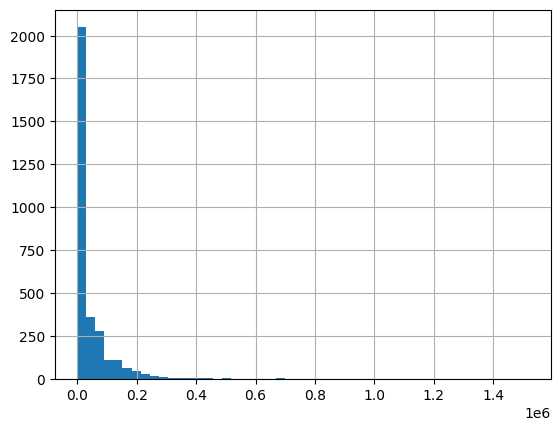

In [74]:
df['Total Bcy'].hist(bins=50)

In [81]:
df['Difference'] = df['Total Bcy'] - df['Sub Total Bcy']
df['Difference'].value_counts().head()


Difference
 0.00      3135
-8.07         1
-275.00       1
-106.00       1
-827.78       1
Name: count, dtype: int64

In [124]:
df = df.drop(columns=['Sub Total Bcy'])

In [ ]:
df['Item Name'].value_counts().head(10)

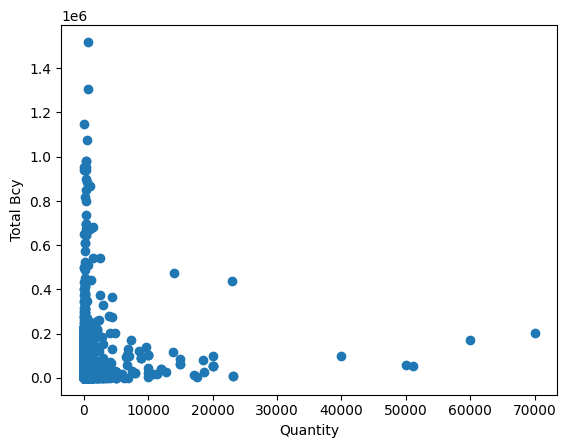

In [82]:
import matplotlib.pyplot as plt

plt.scatter(df['Quantity'], df['Total Bcy'])
plt.xlabel("Quantity")
plt.ylabel("Total Bcy")
plt.show()


In [86]:
df.groupby('Currency Code')['Total Bcy'].describe()

,count,mean,std,min,25%,50%,75%,max
Currency Code,,,,,,,,
SAR,3085.0,49124.784622,105484.689589,0.00,2000.00,12720.0,57600.00,1519000.00
USD,65.0,20731.885846,37238.025749,865.84,3016.02,6012.8,30703.12,258080.65


In [125]:
df.groupby('Currency Code')['Total Bcy'].agg(['count','sum','mean'])


,count,sum,mean
Currency Code,,,
SAR,3081,1.515500e+08,49188.562337
USD,65,1.347573e+06,20731.885846


In [130]:
df['Item Name'].nunique()

2300

In [131]:
df['Item Name'].value_counts().head(10)


Item Name
Unknown Product                       240
حديد سابك 16 ملم 12 م                  13
حديد تسليح اتفاق 14مم 12متر            11
حديد تسليح اتفاق 16مم 12متر            11
حديد تسليح اتفاق 20مم 12متر            11
حديد تسليح وطني 14 مم *12 متر           9
حديد تسليح سابك مسحوب 6 متر 8 مم        9
حديد تسليح سابك مسحوب 12 متر 10 مم      8
حديد تسليح وطني 12 مم*12متر             8
براغي مجلفن حار A325                    8
Name: count, dtype: int64

In [132]:
df.groupby('Item Name')['Total Bcy'].sum().sort_values(ascending=False).head(10)

Item Name
Unknown Product                                              15121493.55
حديد كويل 9 مل                                                3297700.00
حديد كويل 11 مل                                               3138450.00
Crump Rubber                                                  2189700.00
خرسانة جاهزة                                                  2086304.34
حديد كويل 11 ملم                                              1999200.00
حديد تسليح اليمامة 14 مل                                      1317000.00
حديد كويل 9 ملم                                               1225000.00
حديد سابك 16 ملم 12 م                                         1197100.00
Square Tube 150 x 150 x 4.8 mm x 12mtr ASTM A 500 Grade B     1184030.00
Name: Total Bcy, dtype: float64

In [133]:
df.groupby('Item Name')['Total Bcy'].sum().sort_values(ascending=False).head(20)


Item Name
Unknown Product                                                                                         15121493.55
حديد كويل 9 مل                                                                                           3297700.00
حديد كويل 11 مل                                                                                          3138450.00
Crump Rubber                                                                                             2189700.00
خرسانة جاهزة                                                                                             2086304.34
حديد كويل 11 ملم                                                                                         1999200.00
حديد تسليح اليمامة 14 مل                                                                                 1317000.00
حديد كويل 9 ملم                                                                                          1225000.00
حديد سابك 16 ملم 12 م                                         

In [134]:
df.groupby('Item Name')['Unit Price'].median().sort_values(ascending=False).head(10)

Item Name
حديد مقاسات مختلفة                                           512500.000000
اعمال تركيب الهناجر (50% من تصنيع وتركيب الهيكل المعدني )    500000.000000
حديد قطاعات (كيربي)                                          499000.000000
مواد كسارة                                                   434782.610000
4X240 CU/XLPE/SWA/PVC                                        384589.830508
Ready mix concrete                                           291335.990000
ساندوتش بانل                                                 290000.000000
خرسانة جاهزة                                                 275000.000000
توريج حديد تسليح                                             250000.000000
4X120 CU/XLPE/SWA/PVC                                        197700.000000
Name: Unit Price, dtype: float64

In [135]:
df.groupby('Item Name')['Quantity'].mean().sort_values(ascending=False).head(10)

Item Name
بلك عادي مقاس 20                                                      50000.0
Trina Solar Panels Mono PERC DE19 Model: DE19 550 W ( unit: WATT )    34100.0
FLATE WASHER H D G F436                                               23180.0
توريد وتشغيل طبقة اسفلت سماكة 4 سم - مع رش طبقة RC2                   23000.0
Polystyrene - EPS                                                     20000.0
Acrylic                                                               18500.0
AQUATERRA PPR ELBOW 90˚ 20mm                                          17500.0
GI 0.60X1219X2440MM                                                   15000.0
GI 0.60X1219XC                                                        15000.0
Duct Fabrication from G.I.Steel - G.90                                13840.0
Name: Quantity, dtype: float64

In [146]:
import re
def word_lang(word):
    if re.search(r'[\u0600-\u06FF]', word):
        return "Arabic"
    return "English"

df['Tokens'] = df['Item Name'].apply(lambda x: x.split())
df['Lang_Tokens'] = df['Tokens'].apply(lambda words: [word_lang(w) for w in words])


In [ ]:
service_keywords = [
    
    "installation","service","maintenance","repair","inspection","calibration",
    "testing","commissioning","training","consulting","labor","fabrication",
    "welding","painting","assembly","delivery","transport","rent","leasing",
    "support","operation","upgrade","replacement","supervision","workshop",
    "civil works","scaffolding","cleaning","polishing","finishing","construction",
    "earthworks","surveying","demolition","renovation","paving","landscaping",
    "excavation","drilling","plumbing","electrical","carpentry","masonry",
    "air conditioning","hvac","pipeline","installation works","supply & install",

    "تركيب","اعمال","توريد","تشغيل","صيانة","خدمة","تأجير","تدريب","اختبار",
    "فحص","دهان","لحام","تصنيع","نقل","تشطيب","ترميم","بناء","مقاول","اشراف",
    "توريدات","تنظيف","تشييد","تفكيك","هدم","اعادة","سفلتة","رصف","مسح",
    "سباكة","كهرباء","نجارة","مباني","خرسانة","ارضيات","عزل","دهانات"
]

material_keywords = [

    "steel","iron","aluminum","copper","cable","wire","panel","block","brick",
    "cement","concrete","sand","gravel","aggregate","pipe","valve","rubber",
    "gasket","nut","bolt","washer","glass","ceramic","tile","timber","wood",
    "plywood","paint","plaster","asphalt","insulation","bitumen","mesh","rod",
    "beam","screw","nail","adhesive","sealant","flooring","marble","granite",
    "gypsum","pvc","plastic","polyethylene","battery","hose","filter","cartridge",
    "tank","sheet","fabric","cloth","foam","stone","copper wire","panel board",

    "حديد","صلب","المونيوم","نحاس","كابل","سلك","لوح","بلك","طوب","اسمنت",
    "خرسانة","رمل","حصى","ركام","مواسير","صمام","ربر","جلدة","صامولة","برغي",
    "غسالة","زجاج","سيراميك","بلاط","خشب","خشبي","دهان","جبس","عازل","بيتومين",
    "شبك","قضيب","شاسيه","مسامير","لاصق","سيليكون","ارضيات","رخام","جرانيت",
    "بولي","بطارية","خرطوم","فلتر","خزان","قماش","حجر","لوح","صفائح","عازل حراري"
]


def classify_item(name):
    name_low = name.lower()
    service_hits = [kw for kw in service_keywords if kw in name_low]
    material_hits = [kw for kw in material_keywords if kw in name_low]

    if service_hits and material_hits:
        return "Mixed"
    elif service_hits:
        return "Service"
    elif material_hits:
        return "Material"
    else:
        return "Other"

df['Category'] = df['Item Name'].apply(classify_item)
df['Category'].value_counts()

Category
Other       1589
Material    1424
Mixed         72
Service       61
Name: count, dtype: int64

In [164]:
df[df['Category']=='Other'][['Item Name']]

,Item Name
233,HEB 200X200X15X9MMX12MTR
234,HEB 280X280X10.5X18MMX12MTR
235,IPE 300X150X7.1X10.7X12MTR
236,HEB 260X260X10X17.5MMX12MTR
247,Tube 40x40x1.20x6000MM
...,...
3134,12.0 mm Black Deformed Straight Bar G60 – 12M ...
3135,14.0 mm Black Deformed Straight Bar G60 – 12M ...
3136,12.0 MM Black deformed straight bar G60-12m-It...
3140,32.0 mm Black Deformed Straight Bar G60-12 M-S...


In [168]:
mask = df['Currency Code'] == 'USD'

In [169]:
df.loc[mask, 'Total Bcy'] = df.loc[mask, 'Total Bcy'] * 3.75
df.loc[mask, 'Currency Code'] = 'SAR'


In [171]:
(df['Currency Code'] == 'USD').info()

<class 'pandas.core.series.Series'>
Index: 3146 entries, 0 to 3149
Series name: Currency Code
Non-Null Count  Dtype
--------------  -----
3146 non-null   bool 
dtypes: bool(1)
memory usage: 27.7 KB


In [172]:
df

,Item ID,Item Name,Quantity,Total Bcy,Purchase Order ID,Product ID,Currency Code,Account ID,Tax ID,Project ID,Difference,Unit Price,Pct_Diff,Zero_Value,Tokens,Lang_Tokens,Category
0,3263831000000089042,Unknown Product,75.21,227510.25,3263831000000089040,NaN,SAR,3263831000000034003,3.263831e+18,NaN,0.0,3025.0,0.0,False,"[Unknown, Product]","[English, English]",Material
1,3263831000000089046,Unknown Product,15.00,47250.00,3263831000000089040,NaN,SAR,3263831000000034003,3.263831e+18,NaN,0.0,3150.0,0.0,False,"[Unknown, Product]","[English, English]",Material
2,3263831000000089044,Unknown Product,50.00,160000.00,3263831000000089040,NaN,SAR,3263831000000034003,3.263831e+18,NaN,0.0,3200.0,0.0,False,"[Unknown, Product]","[English, English]",Material
3,3263831000000092044,Unknown Product,12.00,38280.00,3263831000000092040,NaN,SAR,3263831000000034003,3.263831e+18,NaN,0.0,3190.0,0.0,False,"[Unknown, Product]","[English, English]",Material
4,3263831000000092052,Unknown Product,2.00,5900.00,3263831000000092040,NaN,SAR,3263831000000034003,3.263831e+18,NaN,0.0,2950.0,0.0,False,"[Unknown, Product]","[English, English]",Material
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,3263831000016006011,"ITTIFAQ STEEL 14mm, 12 meter",30.00,69000.00,3263831000016006001,3.263831e+18,SAR,3263831000000034003,3.263831e+18,NaN,0.0,2300.0,0.0,False,"[ITTIFAQ, STEEL, 14mm,, 12, meter]","[English, English, English, English, English]",Material
3146,3263831000016006009,"ITTIFAQ STEEL 12mm, 12 meter",30.00,69000.00,3263831000016006001,3.263831e+18,SAR,3263831000000034003,3.263831e+18,NaN,0.0,2300.0,0.0,False,"[ITTIFAQ, STEEL, 12mm,, 12, meter]","[English, English, English, English, English]",Material
3147,3263831000016208289,حديد تسليح مجدول سعودي سابك 16 مم * 12 م,30.00,69000.00,3263831000016208283,3.263831e+18,SAR,3263831000000034003,3.263831e+18,NaN,0.0,2300.0,0.0,False,"[حديد, تسليح, مجدول, سعودي, سابك, 16, مم, *, 1...","[Arabic, Arabic, Arabic, Arabic, Arabic, Engli...",Material
3148,3263831000016208285,حديد تسليح مجدول سعودي سابك 12 مم * 12 م,30.00,69000.00,3263831000016208283,3.263831e+18,SAR,3263831000000034003,3.263831e+18,NaN,0.0,2300.0,0.0,False,"[حديد, تسليح, مجدول, سعودي, سابك, 12, مم, *, 1...","[Arabic, Arabic, Arabic, Arabic, Arabic, Engli...",Material
